<a href="https://colab.research.google.com/github/sidagarwal-labs/Analyzing-Yelp-Reviews---Philadelphia-Restaurants/blob/main/Yelp_Regression_Philly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#read parquet files into df's
import pandas as pd

reviews_df = pd.read_parquet('/content/rest_reviews_last10.parquet')
checkin_df = pd.read_parquet('/content/checkin.parquet')

In [ ]:
checkin_df

,business_id,date
0,-0M0b-XhtFagyLmsBtOe8w,"2012-02-09 22:11:59, 2012-02-17 23:03:05, 2012..."
1,-0PN_KFPtbnLQZEeb23XiA,"2011-02-23 05:39:14, 2011-03-01 21:58:33, 2011..."
2,-0TffRSXXIlBYVbb5AwfTg,"2013-05-31 23:03:18, 2013-05-31 23:05:01, 2013..."
3,-0eUa8TsXFFy0FCxHYmrjg,"2015-09-25 17:19:51, 2015-09-28 18:00:56, 2015..."
4,-1B9pP_CrRBJYPICE5WbRA,"2012-07-19 22:37:27, 2012-07-21 00:43:42, 2012..."
...,...,...
5651,zxRmQ_FWVowh8rlzLCSURQ,"2012-04-17 22:08:24, 2012-04-24 23:06:21, 2012..."
5652,zxY4DgtXsVHihSUpsmwamg,"2013-01-04 21:46:10, 2013-05-10 20:25:59, 2014..."
5653,zyMkbavgHASQtqVwaock9A,"2011-03-01 18:37:14, 2011-03-17 16:57:42, 2011..."
5654,zz-fcqurtm77bZ_rVvo2Lw,"2011-11-30 19:57:40, 2012-02-15 21:19:38, 2012..."


In [ ]:
# get total checkins per restaurant

checkin_df['num_checkins_per_entry'] = checkin_df['date'].apply(lambda x: len(x.split(', ')))
total_checkins_df = checkin_df.groupby('business_id')['num_checkins_per_entry'].sum().reset_index(name='total_checkins')
print("Total Checkins DataFrame (based on counting comma-separated dates):")
print(total_checkins_df.head())

Total Checkins DataFrame (based on counting comma-separated dates):
              business_id  total_checkins
0  -0M0b-XhtFagyLmsBtOe8w              57
1  -0PN_KFPtbnLQZEeb23XiA              15
2  -0TffRSXXIlBYVbb5AwfTg            1495
3  -0eUa8TsXFFy0FCxHYmrjg              33
4  -1B9pP_CrRBJYPICE5WbRA            3552


In [ ]:
# get review length for each review

reviews_df['review_length'] = reviews_df['text'].apply(len)
print("Reviews DataFrame with 'review_length' column:")
print(reviews_df.head())

Reviews DataFrame with 'review_length' column:
                review_id                 user_id             business_id  \
0  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
1  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
2  JBWZmBy69VMggxj3eYn17Q  aFa96pz67TwOFu4Weq5Agg  kq5Ghhh14r-eCxlVmlyd8w   
3  YcLXh-3UC9y6YFAI9xxzPQ  G0DHgkSsDozqUPWtlxVEMw  oBhJuukGRqPVvYBfTkhuZA   
4  mCVyppNwK2qPOJHXgs0p2Q  mNITUu6B2wUKBOa4NmUHJg  NQSnr4RPUScss607oxOaqw   

   stars_x  useful  funny  cool  \
0        5       1      0     1   
1        1       1      2     1   
2        5       0      0     0   
3        4       0      0     0   
4        5       0      0     0   

                                                text                date  \
0  Wow!  Yummy, different,  delicious.   Our favo... 2015-01-04 00:01:03   
1  I am a long term frequent customer of this est... 2015-09-23 23:10:31   
2  My boyfriend and I tried this deli for the fir..

In [ ]:
#find average reveiw length per restaurant and add them to new df

reviews_agg_df = reviews_df.groupby('business_id').agg(
    total_reviews=('review_id', 'count'),
    average_review_length=('review_length', 'mean')
).reset_index()
print("Aggregated Reviews DataFrame:")
print(reviews_agg_df.head())

Aggregated Reviews DataFrame:
              business_id  total_reviews  average_review_length
0  -0M0b-XhtFagyLmsBtOe8w              5             746.400000
1  -0PN_KFPtbnLQZEeb23XiA              2             259.000000
2  -0TffRSXXIlBYVbb5AwfTg            918             616.299564
3  -0eUa8TsXFFy0FCxHYmrjg             28             489.678571
4  -1B9pP_CrRBJYPICE5WbRA            477             496.897275


In [ ]:
# iomport text blob for semtiment

import sys
!{sys.executable} -m pip install textblob

from textblob import TextBlob

def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

print("TextBlob installed, imported, and get_sentiment_polarity function defined.")

TextBlob installed, imported, and get_sentiment_polarity function defined.


In [ ]:
#find average semtiment per restaurant as average poliarity score from reviews

reviews_df['polarity_score'] = reviews_df['text'].apply(get_sentiment_polarity)

polarity_agg_df = reviews_df.groupby('business_id').agg(
    average_polarity=('polarity_score', 'mean')
).reset_index()

print("Reviews DataFrame with 'polarity_score' column:")
print(reviews_df[['business_id', 'text', 'polarity_score']].head())
print("\nAggregated Polarity DataFrame:")
print(polarity_agg_df.head())

Reviews DataFrame with 'polarity_score' column:
              business_id                                               text  \
0  kxX2SOes4o-D3ZQBkiMRfA  Wow!  Yummy, different,  delicious.   Our favo...   
1  04UD14gamNjLY0IDYVhHJg  I am a long term frequent customer of this est...   
2  kq5Ghhh14r-eCxlVmlyd8w  My boyfriend and I tried this deli for the fir...   
3  oBhJuukGRqPVvYBfTkhuZA  The only reason I didn't give this restaurant ...   
4  NQSnr4RPUScss607oxOaqw  My brother came to visit and we wanted to pick...   

   polarity_score  
0        0.302557  
1        0.202778  
2        0.152778  
3        0.084196  
4        0.488889  

Aggregated Polarity DataFrame:
              business_id  average_polarity
0  -0M0b-XhtFagyLmsBtOe8w          0.278335
1  -0PN_KFPtbnLQZEeb23XiA         -0.089313
2  -0TffRSXXIlBYVbb5AwfTg          0.336832
3  -0eUa8TsXFFy0FCxHYmrjg          0.267324
4  -1B9pP_CrRBJYPICE5WbRA          0.259322


In [ ]:
# merge everything to one data frame

merged_df = pd.merge(total_checkins_df, reviews_agg_df, on='business_id', how='outer')
aggregated_restaurant_info_df = pd.merge(merged_df, polarity_agg_df, on='business_id', how='outer')

print("Aggregated Restaurant Information DataFrame:")
print(aggregated_restaurant_info_df.head())

Aggregated Restaurant Information DataFrame:
              business_id  total_checkins  total_reviews  \
0  -0M0b-XhtFagyLmsBtOe8w            57.0            5.0   
1  -0PN_KFPtbnLQZEeb23XiA            15.0            2.0   
2  -0TffRSXXIlBYVbb5AwfTg          1495.0          918.0   
3  -0eUa8TsXFFy0FCxHYmrjg            33.0           28.0   
4  -1B9pP_CrRBJYPICE5WbRA          3552.0          477.0   

   average_review_length  average_polarity  
0             746.400000          0.278335  
1             259.000000         -0.089313  
2             616.299564          0.336832  
3             489.678571          0.267324  
4             496.897275          0.259322  


In [ ]:
# create new restaurant variable and add it to the df

reviews_df['date'] = pd.to_datetime(reviews_df['date'])
first_review_dates = reviews_df.groupby('business_id')['date'].min().reset_index(name='first_review_date')

new_restaurant_threshold = pd.to_datetime('2020-01-01')
first_review_dates['is_new_restaurant'] = first_review_dates['first_review_date'] > new_restaurant_threshold

# Drop any existing 'is_new_restaurant' columns to avoid duplicates from re-runs
aggregated_restaurant_info_df = aggregated_restaurant_info_df.drop(columns=[col for col in aggregated_restaurant_info_df.columns if 'is_new_restaurant' in col], errors='ignore')

aggregated_restaurant_info_df = pd.merge(aggregated_restaurant_info_df, first_review_dates[['business_id', 'is_new_restaurant']], on='business_id', how='left')

print("Aggregated Restaurant Information DataFrame with 'is_new_restaurant' column:")
print(aggregated_restaurant_info_df.head())

Aggregated Restaurant Information DataFrame with 'is_new_restaurant' column:
              business_id  total_checkins  total_reviews  \
0  -0M0b-XhtFagyLmsBtOe8w            57.0            5.0   
1  -0PN_KFPtbnLQZEeb23XiA            15.0            2.0   
2  -0TffRSXXIlBYVbb5AwfTg          1495.0          918.0   
3  -0eUa8TsXFFy0FCxHYmrjg            33.0           28.0   
4  -1B9pP_CrRBJYPICE5WbRA          3552.0          477.0   

   average_review_length  average_polarity is_new_restaurant  
0             746.400000          0.278335             False  
1             259.000000         -0.089313             False  
2             616.299564          0.336832             False  
3             489.678571          0.267324             False  
4             496.897275          0.259322             False  


In [ ]:
# Extract business_id and stars_y, dropping duplicates to get one stars_y per business
business_ratings = reviews_df[['business_id', 'stars_y']].drop_duplicates()

# Merge this with the aggregated_restaurant_info_df
aggregated_restaurant_info_df = pd.merge(aggregated_restaurant_info_df, business_ratings, on='business_id', how='left')

# Rename 'stars_y' to 'rating'
aggregated_restaurant_info_df = aggregated_restaurant_info_df.rename(columns={'stars_y': 'rating'})

print("Aggregated Restaurant Information DataFrame with 'rating' column:")
print(aggregated_restaurant_info_df.head())

Aggregated Restaurant Information DataFrame with 'rating' column:
              business_id  total_checkins  total_reviews  \
0  -0M0b-XhtFagyLmsBtOe8w            57.0            5.0   
1  -0PN_KFPtbnLQZEeb23XiA            15.0            2.0   
2  -0TffRSXXIlBYVbb5AwfTg          1495.0          918.0   
3  -0eUa8TsXFFy0FCxHYmrjg            33.0           28.0   
4  -1B9pP_CrRBJYPICE5WbRA          3552.0          477.0   

   average_review_length  average_polarity is_new_restaurant  rating  
0             746.400000          0.278335             False     3.5  
1             259.000000         -0.089313             False     3.5  
2             616.299564          0.336832             False     4.5  
3             489.678571          0.267324             False     4.0  
4             496.897275          0.259322             False     4.0  


In [ ]:
def get_category_counts(df):
    # Select relevant columns
    category_data = df[['business_id', 'categories']].copy()

    # Split categories string into a list of categories
    category_data['categories'] = category_data['categories'].str.split(', ')

    # Explode the categories list to have one category per row
    exploded_categories = category_data.explode('categories')

    # Group by business_id and category, then count occurrences
    # Use .unstack(fill_value=0) to pivot categories into columns
    business_category_counts = exploded_categories.groupby(['business_id', 'categories']).size().unstack(fill_value=0)

    return business_category_counts

# Call the function with reviews_df
business_category_counts = get_category_counts(reviews_df)

print("Business Category Counts DataFrame:")
print(business_category_counts.head())

Business Category Counts DataFrame:
categories              Acai Bowls  Active Life  Adult  Adult Education  \
business_id                                                               
-0M0b-XhtFagyLmsBtOe8w           0            0      0                0   
-0PN_KFPtbnLQZEeb23XiA           0            0      0                0   
-0TffRSXXIlBYVbb5AwfTg           0            0      0                0   
-0eUa8TsXFFy0FCxHYmrjg           0            0      0                0   
-1B9pP_CrRBJYPICE5WbRA           0            0      0                0   

categories              Adult Entertainment  Afghan  African  Airport Lounges  \
business_id                                                                     
-0M0b-XhtFagyLmsBtOe8w                    0       0        0                0   
-0PN_KFPtbnLQZEeb23XiA                    0       0        0                0   
-0TffRSXXIlBYVbb5AwfTg                    0       0        0                0   
-0eUa8TsXFFy0FCxHYmrjg           

In [ ]:
top_categories = business_category_counts.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)
top_categories_df = top_categories.reset_index(name='top_5_categories')

# Join the list of categories into a single string for better readability if desired, or keep as list
top_categories_df['top_5_categories_str'] = top_categories_df['top_5_categories'].apply(lambda x: ', '.join(x))

aggregated_restaurant_info_df = pd.merge(aggregated_restaurant_info_df, top_categories_df[['business_id', 'top_5_categories_str']], on='business_id', how='left')

print("Aggregated Restaurant Information DataFrame with Top 5 Categories:")
print(aggregated_restaurant_info_df.head())

Aggregated Restaurant Information DataFrame with Top 5 Categories:
              business_id  total_checkins  total_reviews  \
0  -0M0b-XhtFagyLmsBtOe8w            57.0            5.0   
1  -0PN_KFPtbnLQZEeb23XiA            15.0            2.0   
2  -0TffRSXXIlBYVbb5AwfTg          1495.0          918.0   
3  -0eUa8TsXFFy0FCxHYmrjg            33.0           28.0   
4  -1B9pP_CrRBJYPICE5WbRA          3552.0          477.0   

   average_review_length  average_polarity is_new_restaurant  rating  \
0             746.400000          0.278335             False     3.5   
1             259.000000         -0.089313             False     3.5   
2             616.299564          0.336832             False     4.5   
3             489.678571          0.267324             False     4.0   
4             496.897275          0.259322             False     4.0   

                                top_5_categories_str  
0    Bars, French, Nightlife, Restaurants, Wine Bars  
1  Chinese, Restaurants, Acai

In [ ]:
# First, let's revert aggregated_restaurant_info_df to its state before the incorrect dummy columns were added
# Identify the base columns that should always be present
base_columns = ['business_id', 'total_checkins', 'total_reviews', 'average_review_length', 'average_polarity', 'is_new_restaurant', 'rating']

# Filter aggregated_restaurant_info_df to only these base columns. This will drop any previously created dummy columns.
aggregated_restaurant_info_df = aggregated_restaurant_info_df[base_columns].copy()

# Now, perform the correct one-hot encoding using the 'top_categories_df'
# 'top_categories_df' contains 'business_id' and 'top_5_categories' (which is a list of categories)

# Explode the list of top 5 categories into separate rows
exploded_categories_for_dummies = top_categories_df[['business_id', 'top_5_categories']].explode('top_5_categories')

# Create dummy variables for each individual category
individual_category_dummies = pd.get_dummies(exploded_categories_for_dummies['top_5_categories'], prefix='', prefix_sep='')

# Add the business_id back to the dummy DataFrame
individual_category_dummies = pd.concat([exploded_categories_for_dummies['business_id'], individual_category_dummies], axis=1)

# Group by business_id and take the max to indicate the presence of a category (1 if present, 0 if not)
individual_category_dummies = individual_category_dummies.groupby('business_id').max().reset_index()

# Merge these new individual category dummy columns with the aggregated_restaurant_info_df
aggregated_restaurant_info_df = pd.merge(aggregated_restaurant_info_df, individual_category_dummies, on='business_id', how='left')

print("Aggregated Restaurant Information DataFrame with individual category columns:")
print(aggregated_restaurant_info_df.head())

Aggregated Restaurant Information DataFrame with individual category columns:
              business_id  total_checkins  total_reviews  \
0  -0M0b-XhtFagyLmsBtOe8w            57.0            5.0   
1  -0PN_KFPtbnLQZEeb23XiA            15.0            2.0   
2  -0TffRSXXIlBYVbb5AwfTg          1495.0          918.0   
3  -0eUa8TsXFFy0FCxHYmrjg            33.0           28.0   
4  -1B9pP_CrRBJYPICE5WbRA          3552.0          477.0   

   average_review_length  average_polarity is_new_restaurant  rating  \
0             746.400000          0.278335             False     3.5   
1             259.000000         -0.089313             False     3.5   
2             616.299564          0.336832             False     4.5   
3             489.678571          0.267324             False     4.0   
4             496.897275          0.259322             False     4.0   

  Acai Bowls Active Life  Adult  ...  Vegan Vegetarian Venezuelan  \
0      False       False  False  ...  False      False     

In [ ]:
aggregated_restaurant_info_df

In [ ]:


#filter out specific categories related to types of food

food_keywords = [
    'Cafe', 'Deli', 'Bakery', 'Breakfast', 'Brunch','Bars', 'Acai Bowls','Fast Food', 'Burmese',
    'Lunch', 'Dinner', 'Cuisine', 'Dish', 'Bar', 'Pub', 'Wine', 'Beer', 'Coffee', 'Portuguese',
    'Tea', 'Juice', 'Smoothie', 'Dessert', 'Ice Cream', 'Pizza', 'Burger', 'Sushi', 'Nightlife',
    'Taco', 'Noodle', 'Pasta', 'Meat', 'Seafood', 'Vegetarian', 'Vegan', 'Gluten-Free',
    'Organic', 'Farm', 'Market', 'Grocery', 'Cater', 'Drink', 'Sandwich', 'Soup', 'Laotian',
    'Salad', 'Grill', 'BBQ', 'Bistro', 'Brewery', 'Winery', 'Donut', 'Bagel', 'Wrap',
    'Acai', 'Chicken', 'Mexican', 'Indian', 'Italian', 'Chinese', 'Japanese', 'Thai',
    'Vietnamese', 'Korean', 'Mediterranean', 'Greek', 'French', 'American', 'African',
    'Asian', 'European', 'Latin American', 'Middle Eastern', 'South American',
    'Hawaiian', 'Caribbean', 'Pakistani', 'Halal', 'Kosher', 'Street Vendors', 'Drive-Thru',
    'Fast Food', 'Fine Dining', 'Casual Dining', 'Gastropub', 'Steakhouse', 'Poutineries',
    'Creperies', 'Hot Pot', 'Buffets', 'Churros', 'Cupcakes', 'Patisserie', 'Gelato'
]

def is_food_related(category_name, keywords):
    # Check if the category_name (which is already a single category from the exploded_categories_for_dummies)
    # is present in the keywords list. Using 'in' operator to check if category_name is one of the food_keywords.
    # Also, ensure case-insensitivity.
    for keyword in keywords:
        if category_name.lower() == keyword.lower(): # Changed to exact match
            return True
    return False

# Identify food-related columns
# Ensure 'top_5_categories_str' is not included here as it's a concatenated string, not an individual category
category_columns = [col for col in aggregated_restaurant_info_df.columns if col not in base_columns and col != 'top_5_categories_str']
food_related_columns = [col for col in category_columns if is_food_related(col, food_keywords)]

# Keep only business_id, base columns, and food-related categorical columns
# Ensure 'business_id' is included in `base_columns` or manually added if it's the index in some parts.
final_columns_to_keep = base_columns + food_related_columns

# Drop columns that are not in the final_columns_to_keep from aggregated_restaurant_info_df
# We need to make sure to handle cases where a column might not exist in the DataFrame
existing_final_columns = [col for col in final_columns_to_keep if col in aggregated_restaurant_info_df.columns]

aggregated_restaurant_info_df = aggregated_restaurant_info_df[existing_final_columns].copy()

print("Aggregated Restaurant Information DataFrame with only food-related categories:")
print(aggregated_restaurant_info_df.head())
print(f"Number of food-related category columns kept: {len(food_related_columns)}")

Aggregated Restaurant Information DataFrame with only food-related categories:
              business_id  total_checkins  total_reviews  \
0  -0M0b-XhtFagyLmsBtOe8w            57.0            5.0   
1  -0PN_KFPtbnLQZEeb23XiA            15.0            2.0   
2  -0TffRSXXIlBYVbb5AwfTg          1495.0          918.0   
3  -0eUa8TsXFFy0FCxHYmrjg            33.0           28.0   
4  -1B9pP_CrRBJYPICE5WbRA          3552.0          477.0   

   average_review_length  average_polarity is_new_restaurant  rating  \
0             746.400000          0.278335             False     3.5   
1             259.000000         -0.089313             False     3.5   
2             616.299564          0.336832             False     4.5   
3             489.678571          0.267324             False     4.0   
4             496.897275          0.259322             False     4.0   

  Acai Bowls African   Bars  ... Portuguese Poutineries  Salad Seafood   Soup  \
0      False   False   True  ...      False   

In [ ]:
# convert boolean to int

# Re-define boolean_cols_to_convert to ensure it captures all relevant category columns after the fix in the previous cell
category_columns_after_filter = [col for col in aggregated_restaurant_info_df.columns if col not in base_columns]
boolean_cols_to_convert = ['is_new_restaurant'] + category_columns_after_filter

for col in boolean_cols_to_convert:
    if col in aggregated_restaurant_info_df.columns:
        # Fill NaN values with False before converting to integer
        aggregated_restaurant_info_df[col] = aggregated_restaurant_info_df[col].fillna(False).astype(int)

print("Aggregated Restaurant Information DataFrame with boolean columns converted to binary:")
print(aggregated_restaurant_info_df.head())

Aggregated Restaurant Information DataFrame with boolean columns converted to binary:
              business_id  total_checkins  total_reviews  \
0  -0M0b-XhtFagyLmsBtOe8w            57.0            5.0   
1  -0PN_KFPtbnLQZEeb23XiA            15.0            2.0   
2  -0TffRSXXIlBYVbb5AwfTg          1495.0          918.0   
3  -0eUa8TsXFFy0FCxHYmrjg            33.0           28.0   
4  -1B9pP_CrRBJYPICE5WbRA          3552.0          477.0   

   average_review_length  average_polarity  is_new_restaurant  rating  \
0             746.400000          0.278335                  0     3.5   
1             259.000000         -0.089313                  0     3.5   
2             616.299564          0.336832                  0     4.5   
3             489.678571          0.267324                  0     4.0   
4             496.897275          0.259322                  0     4.0   

   Acai Bowls  African  Bars  ...  Portuguese  Poutineries  Salad  Seafood  \
0           0        0     1  ...   

/tmp/ipython-input-1873806786.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aggregated_restaurant_info_df[col] = aggregated_restaurant_info_df[col].fillna(False).astype(int)
/tmp/ipython-input-1873806786.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aggregated_restaurant_info_df[col] = aggregated_restaurant_info_df[col].fillna(False).astype(int)
/tmp/ipython-input-1873806786.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False

In [ ]:
#impute missing variables

numerical_cols_to_impute_with_mode = [
    'total_checkins',
    'total_reviews',
    'average_review_length',
    'average_polarity',
    'rating'
]

for col in numerical_cols_to_impute_with_mode:
    if col in aggregated_restaurant_info_df.columns:
        # Calculate the mode. If there are multiple modes, pick the first one.
        mode_val = aggregated_restaurant_info_df[col].mode()[0]
        aggregated_restaurant_info_df[col] = aggregated_restaurant_info_df[col].fillna(mode_val)

print("NaN values in specified numerical columns imputed with their respective modes.")
print(aggregated_restaurant_info_df.head())
print("\nCheck for remaining NaNs in numerical columns:")
print(aggregated_restaurant_info_df[numerical_cols_to_impute_with_mode].isnull().sum())


NaN values in specified numerical columns imputed with their respective modes.
              business_id  total_checkins  total_reviews  \
0  -0M0b-XhtFagyLmsBtOe8w            57.0            5.0   
1  -0PN_KFPtbnLQZEeb23XiA            15.0            2.0   
2  -0TffRSXXIlBYVbb5AwfTg          1495.0          918.0   
3  -0eUa8TsXFFy0FCxHYmrjg            33.0           28.0   
4  -1B9pP_CrRBJYPICE5WbRA          3552.0          477.0   

   average_review_length  average_polarity  is_new_restaurant  rating  \
0             746.400000          0.278335                  0     3.5   
1             259.000000         -0.089313                  0     3.5   
2             616.299564          0.336832                  0     4.5   
3             489.678571          0.267324                  0     4.0   
4             496.897275          0.259322                  0     4.0   

   Acai Bowls  African  Bars  ...  Portuguese  Poutineries  Salad  Seafood  \
0           0        0     1  ...          

In [ ]:
# Drop rows where 'rating' is NaN to ensure consistency between X and y
data_for_model = aggregated_restaurant_info_df.dropna(subset=['rating']).copy()

# Create y (target variable)
y = data_for_model['rating']

# Create X (features), dropping 'business_id' and 'rating'
X = data_for_model.drop(columns=['business_id', 'rating'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
y

Shape of X: (5744, 47)
Shape of y: (5744,)

First 5 rows of X:
   total_checkins  total_reviews  average_review_length  average_polarity  \
0            57.0            5.0             746.400000          0.278335   
1            15.0            2.0             259.000000         -0.089313   
2          1495.0          918.0             616.299564          0.336832   
3            33.0           28.0             489.678571          0.267324   
4          3552.0          477.0             496.897275          0.259322   

   is_new_restaurant  Acai Bowls  African  Bars  Beer  Buffets  ...  \
0                  0           0        0     1     0        0  ...   
1                  0           1        0     0     0        0  ...   
2                  0           0        0     1     0        0  ...   
3                  0           0        0     0     0        0  ...   
4                  0           0        0     0     0        0  ...   

   Portuguese  Poutineries  Salad  Seafood  Sou

,rating
0,3.5
1,3.5
2,4.5
3,4.0
4,4.0
...,...
5739,3.0
5740,4.5
5741,4.0
5742,4.0


In [ ]:
# Re-extract y to ensure it has the original float values before binarization
y = data_for_model['rating']

y = (y >= 4).astype(int)

print("First 5 rows of y (binary):")
print(y.head())
print("Value counts for y:")
print(y.value_counts())

First 5 rows of y (binary):
0    0
1    0
2    1
3    1
4    1
Name: rating, dtype: int64
Value counts for y:
rating
1    3098
0    2646
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and binary classification
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7572
Precision: 0.7439
Recall: 0.8387
F1-Score: 0.7885

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       529
           1       0.74      0.84      0.79       620

    accuracy                           0.76      1149
   macro avg       0.76      0.75      0.75      1149
weighted avg       0.76      0.76      0.75      1149



In [ ]:
import pandas as pd

# Get coefficients and feature names
coefficients = log_reg_model.coef_[0]
feature_names = X.columns

# Create a Series for better handling
coefficients_series = pd.Series(coefficients, index=feature_names)

# Display top 10 positive coefficients
top_10_positive = coefficients_series.nlargest(15)
print("\nTop 10 Positive Coefficients:")
print(top_10_positive)

# Display top 10 negative coefficients
top_10_negative = coefficients_series.nsmallest(15)
print("\nTop 10 Negative Coefficients:")
print(top_10_negative)


Top 10 Positive Coefficients:
average_polarity     1.093283
total_reviews        0.486813
Laotian              0.300175
is_new_restaurant    0.216064
Poutineries          0.137436
Burmese              0.134531
Gluten-Free          0.074585
French               0.064932
Portuguese           0.060450
Vegan                0.058757
Hot Pot              0.051800
Mediterranean        0.045478
Hawaiian             0.037288
Vietnamese           0.034106
Vegetarian           0.014524
dtype: float64

Top 10 Negative Coefficients:
Acai Bowls              -0.662567
Bars                    -0.546652
average_review_length   -0.458879
Fast Food               -0.410733
Pizza                   -0.407428
total_checkins          -0.301699
Chinese                 -0.242964
Salad                   -0.210696
Seafood                 -0.197360
Grocery                 -0.111718
Nightlife               -0.108338
Buffets                 -0.100932
Caribbean               -0.099639
Mexican                 -0.0989

In [ ]:
# Convert top_10_positive_cuisine to DataFrame
positive_coeffs_df = top_10_positive.reset_index()
positive_coeffs_df.columns = ['Feature', 'Coefficient']
positive_coeffs_df['Coefficient_Type'] = 'Positive'

# Convert top_10_negative_cuisine to DataFrame
negative_coeffs_df = top_10_negative.reset_index()
negative_coeffs_df.columns = ['Feature', 'Coefficient']
negative_coeffs_df['Coefficient_Type'] = 'Negative'

# Concatenate the two DataFrames
plot_df = pd.concat([positive_coeffs_df, negative_coeffs_df], ignore_index=True)

print("Combined Cuisine Coefficients DataFrame (plot_df_cuisine):")
print(plot_df)

Combined Cuisine Coefficients DataFrame (plot_df_cuisine):
                  Feature  Coefficient Coefficient_Type
0        average_polarity     1.093283         Positive
1           total_reviews     0.486813         Positive
2                 Laotian     0.300175         Positive
3       is_new_restaurant     0.216064         Positive
4             Poutineries     0.137436         Positive
5                 Burmese     0.134531         Positive
6             Gluten-Free     0.074585         Positive
7                  French     0.064932         Positive
8              Portuguese     0.060450         Positive
9                   Vegan     0.058757         Positive
10                Hot Pot     0.051800         Positive
11          Mediterranean     0.045478         Positive
12               Hawaiian     0.037288         Positive
13             Vietnamese     0.034106         Positive
14             Vegetarian     0.014524         Positive
15             Acai Bowls    -0.662567       

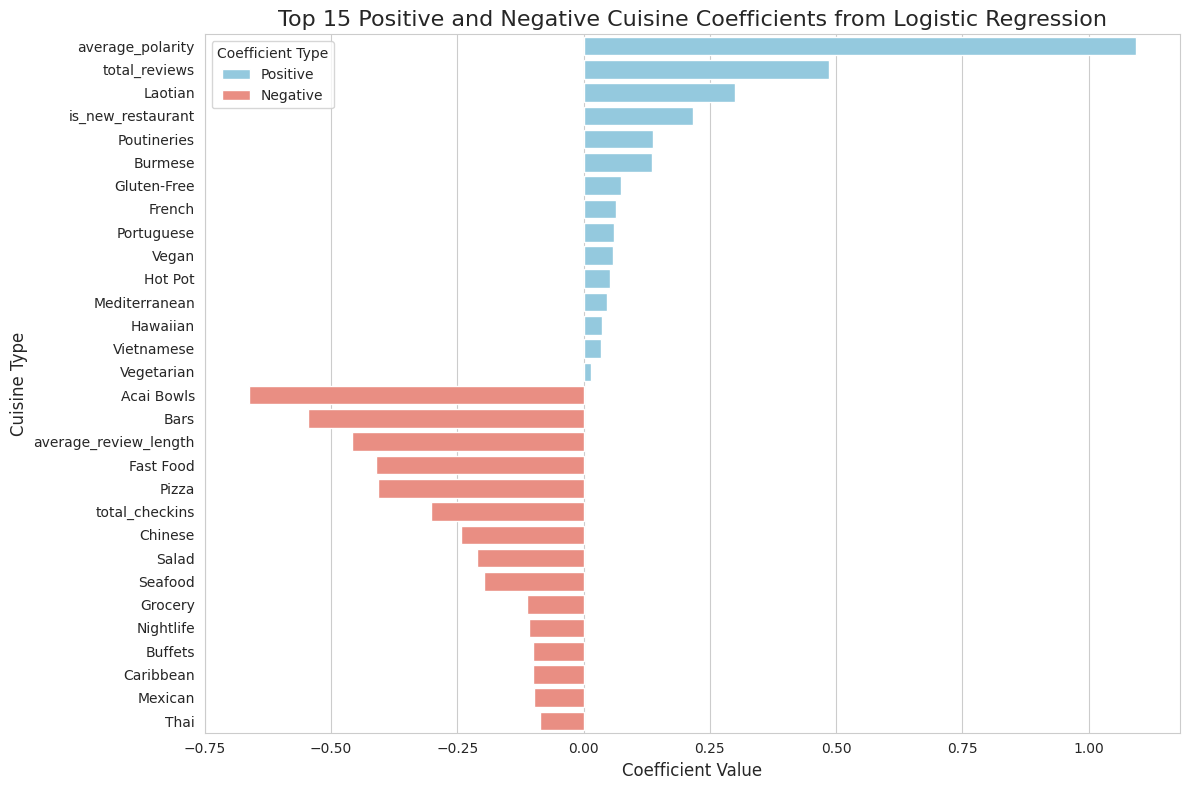

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

# Create the horizontal bar chart
plt.figure(figsize=(12, 8)) # Adjust figure size for better readability
sns.barplot(x='Coefficient', y='Feature', hue='Coefficient_Type', data=plot_df, palette={'Positive': 'skyblue', 'Negative': 'salmon'})

# Add title and labels
plt.title('Top 15 Positive and Negative Cuisine Coefficients from Logistic Regression', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)

# Ensure the legend is visible
plt.legend(title='Coefficient Type')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Task
Calculate and print the skewness of the `total_checkins`, `total_reviews`, `average_review_length`, `average_polarity`, `rating`, and `is_new_restaurant` columns from the `aggregated_restaurant_info_df`.

## Check skewness

### Subtask:
Calculate and print the skewness of the numerical and 'is_new_restaurant' columns from the `aggregated_restaurant_info_df`.


## Summary:

### Data Analysis Key Findings
*   The analysis process initiated a subtask to calculate the skewness for the following columns in the `aggregated_restaurant_info_df`: `total_checkins`, `total_reviews`, `average_review_length`, `average_polarity`, `rating`, and `is_new_restaurant`. The actual computed skewness values are not available in the provided solving process.

### Insights or Next Steps
*   The next logical step is to perform the skewness calculation for the specified columns using appropriate statistical functions.
*   Upon obtaining the skewness values, the distributions of these variables will be assessed. High skewness would indicate a need for data transformation (e.g., logarithmic) to achieve a more normal distribution, which can be beneficial for certain statistical models.
